In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


df_cells = pd.read_excel('Cell_Lines_Details.xlsx')
df_compounds = pd.read_csv('Compounds-annotation.csv')
df_gdsc1 = pd.read_csv('GDSC_DATASET.csv')
df_gdsc2 = pd.read_csv('GDSC2-dataset.csv')

df_cells.rename(columns={'COSMIC identifier': 'COSMIC_ID'}, inplace=True)
df_gdsc1.rename(columns={'COSMIC': 'COSMIC_ID'}, inplace=True)

df_gdsc_combined = pd.concat([df_gdsc1, df_gdsc2], ignore_index=True)

merged_df = pd.merge(df_gdsc_combined, df_cells, on='COSMIC_ID', how='inner')
merged_df = pd.merge(merged_df, df_compounds, on='DRUG_ID', how='inner')

print("dataset size:", merged_df.shape)
print(merged_df.head())

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


dataset size: (484071, 47)
   COSMIC_ID CELL_LINE_NAME     TCGA_DESC  DRUG_ID   DRUG_NAME_x   LN_IC50  \
0     683667         PFSK-1            MB     1003  Camptothecin -1.463887   
1     684057            ES5  UNCLASSIFIED     1003  Camptothecin -3.360586   
2     684059            ES7  UNCLASSIFIED     1003  Camptothecin -5.044940   
3     684062          EW-11  UNCLASSIFIED     1003  Camptothecin -3.741991   
4     684072        SK-ES-1  UNCLASSIFIED     1003  Camptothecin -5.142961   

        AUC   Z_SCORE GDSC Tissue descriptor 1 GDSC Tissue descriptor 2  ...  \
0  0.930220  0.433123           nervous_system          medulloblastoma  ...   
1  0.791072 -0.599569                     bone           ewings_sarcoma  ...   
2  0.592660 -1.516647                     bone           ewings_sarcoma  ...   
3  0.734047 -0.807232                     bone           ewings_sarcoma  ...   
4  0.582439 -1.570016                     bone           ewings_sarcoma  ...   

  GDSC\nTissue\ndescrip

In [80]:
merged_df_clean = merged_df.drop_duplicates(subset=['COSMIC_ID', 'DRUG_ID'])
print("dataset size:", merged_df_clean.shape)

dataset size: (242036, 47)


In [81]:
cols_to_drop = [
    'DATASET', 'NLME_RESULT_ID', 'NLME_CURVE_ID', 'SANGER_MODEL_ID',
    'PUTATIVE_TARGET', 'PATHWAY_NAME', 'COMPANY_ID', 'WEBRELEASE',
    'MIN_CONC', 'MAX_CONC', 'RMSE'
]

merged_df_clean = merged_df_clean.drop(columns=cols_to_drop, errors='ignore')
print("After dropping almost-empty columns:", merged_df_clean.shape)

After dropping almost-empty columns: (242036, 36)


In [82]:
merged_df_clean.rename(columns={
    'Drug\nResponse': 'Drug_Response',
    'GDSC\nTissue descriptor 1': 'GDSC_Tissue_Descriptor_1',
    'GDSC\nTissue\ndescriptor 2': 'GDSC_Tissue_Descriptor_2',
    'Cancer Type\n(matching TCGA label)': 'Cancer_Type_TCGA_Label',
    'Microsatellite \ninstability Status (MSI)': 'MSI_Status'
}, inplace=True)

print(merged_df_clean.columns)

Index(['COSMIC_ID', 'CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_ID', 'DRUG_NAME_x',
       'LN_IC50', 'AUC', 'Z_SCORE', 'GDSC Tissue descriptor 1',
       'GDSC Tissue descriptor 2', 'Cancer Type (matching TCGA label)',
       'Microsatellite instability Status (MSI)', 'Screen Medium_x',
       'Growth Properties_x', 'CNA', 'Gene Expression_x', 'Methylation_x',
       'TARGET_x', 'TARGET_PATHWAY_x', 'Sample Name',
       'Whole Exome Sequencing (WES)', 'Copy Number Alterations (CNA)',
       'Gene Expression_y', 'Methylation_y', 'Drug_Response',
       'GDSC_Tissue_Descriptor_1', 'GDSC_Tissue_Descriptor_2',
       'Cancer_Type_TCGA_Label', 'MSI_Status', 'Screen Medium_y',
       'Growth Properties_y', 'SCREENING_SITE', 'DRUG_NAME_y', 'SYNONYMS',
       'TARGET_y', 'TARGET_PATHWAY_y'],
      dtype='object')


In [83]:
print("Missing values per column:")
print(merged_df_clean.isnull().sum())

Missing values per column:
COSMIC_ID                                      0
CELL_LINE_NAME                                 0
TCGA_DESC                                   1067
DRUG_ID                                        0
DRUG_NAME_x                                    0
LN_IC50                                        0
AUC                                            0
Z_SCORE                                        0
GDSC Tissue descriptor 1                    9367
GDSC Tissue descriptor 2                    9367
Cancer Type (matching TCGA label)          51447
Microsatellite instability Status (MSI)    12354
Screen Medium_x                             9367
Growth Properties_x                         9367
CNA                                         9367
Gene Expression_x                           9367
Methylation_x                               9367
TARGET_x                                   27156
TARGET_PATHWAY_x                               1
Sample Name                               

In [84]:
# Save the final cleaned dataset
merged_df_clean.to_csv('final_merged_dataset.csv', index=False)

Missing values in percentage:
SYNONYMS                                   26.371284
Cancer Type (matching TCGA label)          21.255929
Cancer_Type_TCGA_Label                     17.977904
TARGET_x                                   11.219819
TARGET_y                                   11.219405
Microsatellite instability Status (MSI)     5.104199
Screen Medium_x                             3.870085
GDSC Tissue descriptor 2                    3.870085
Gene Expression_x                           3.870085
Methylation_x                               3.870085
Growth Properties_x                         3.870085
GDSC Tissue descriptor 1                    3.870085
CNA                                         3.870085
MSI_Status                                  1.234114
TCGA_DESC                                   0.440844
TARGET_PATHWAY_x                            0.000413
DRUG_ID                                     0.000000
CELL_LINE_NAME                              0.000000
COSMIC_ID       

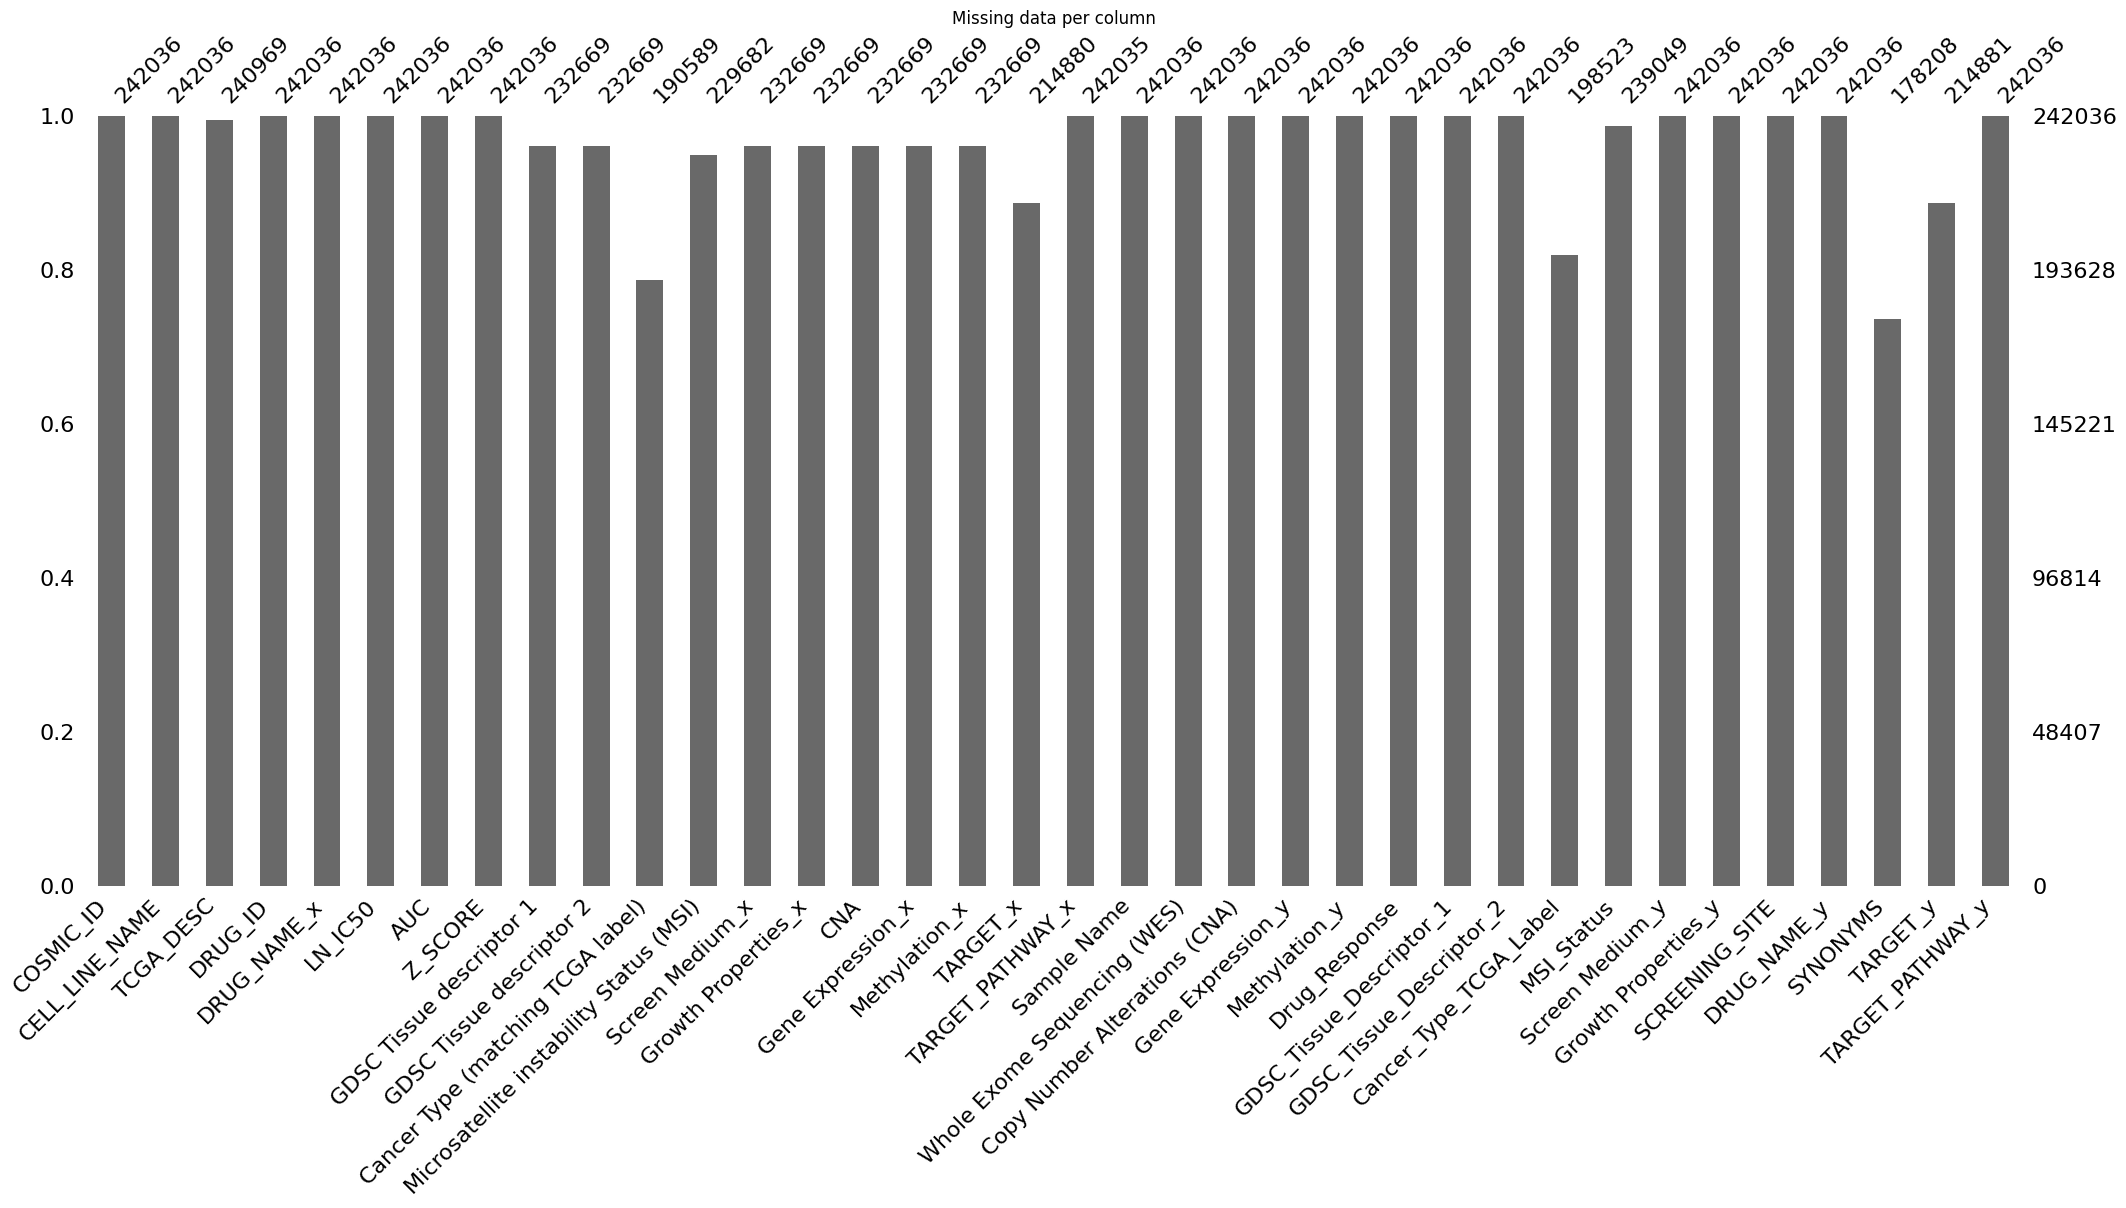

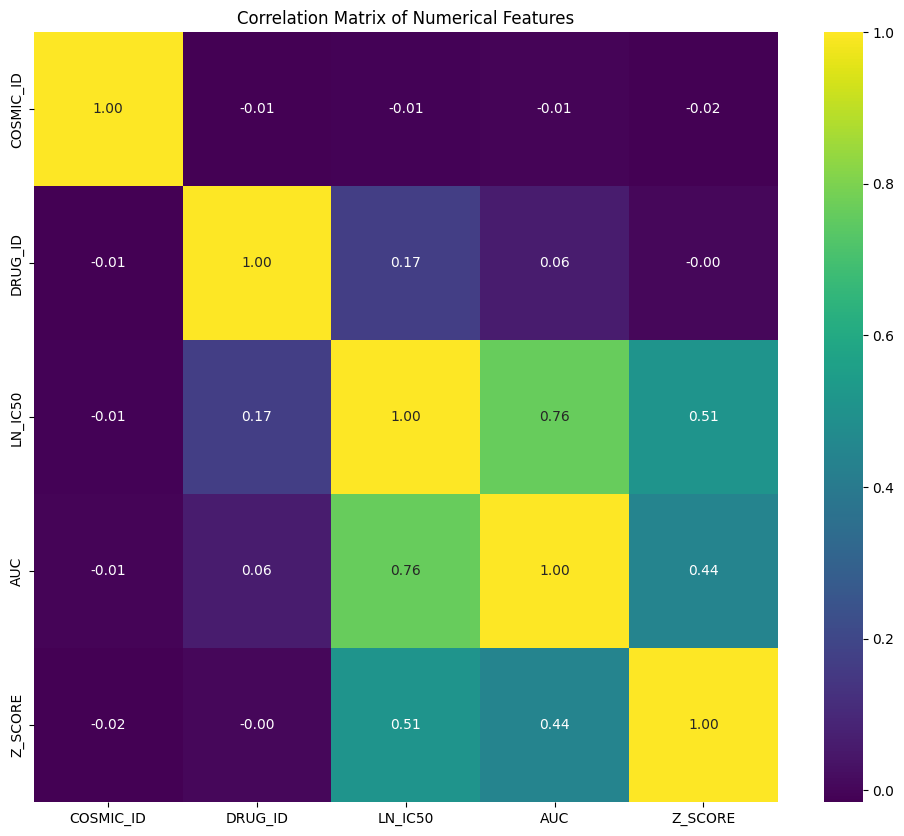

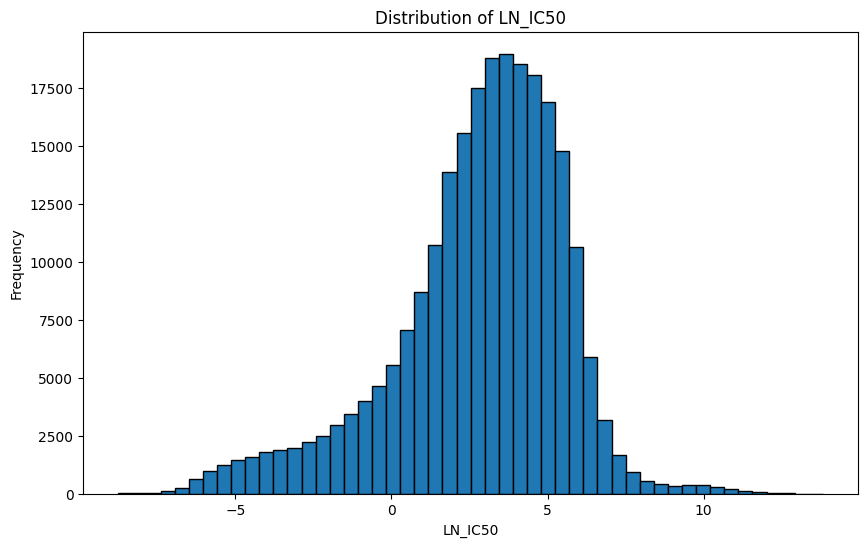

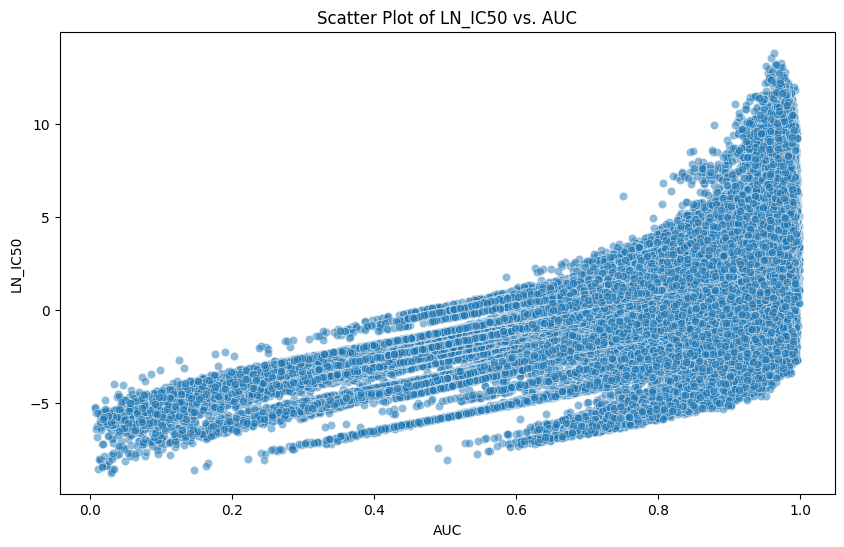

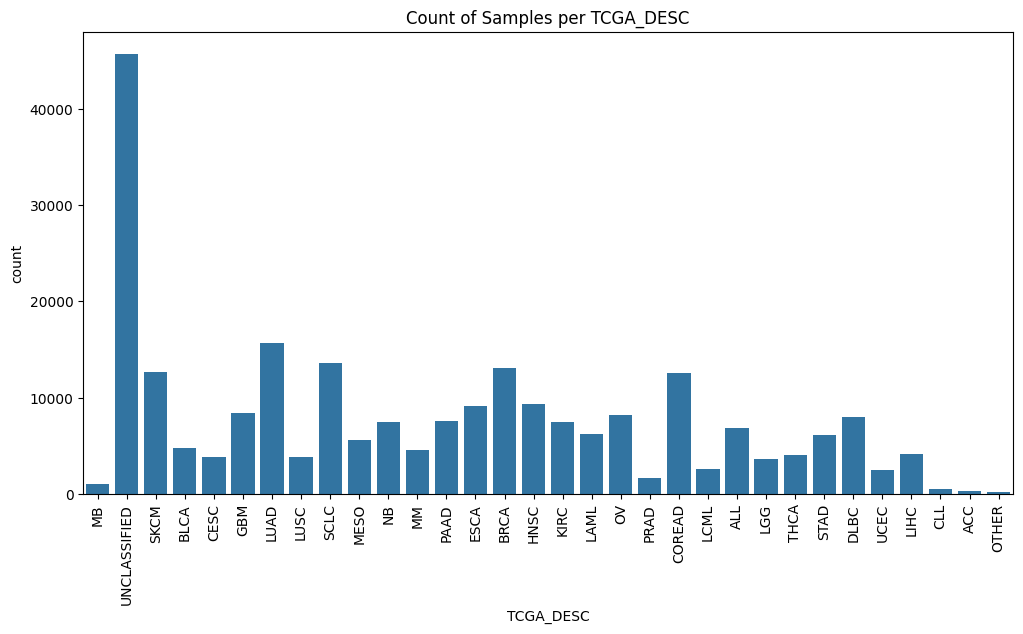

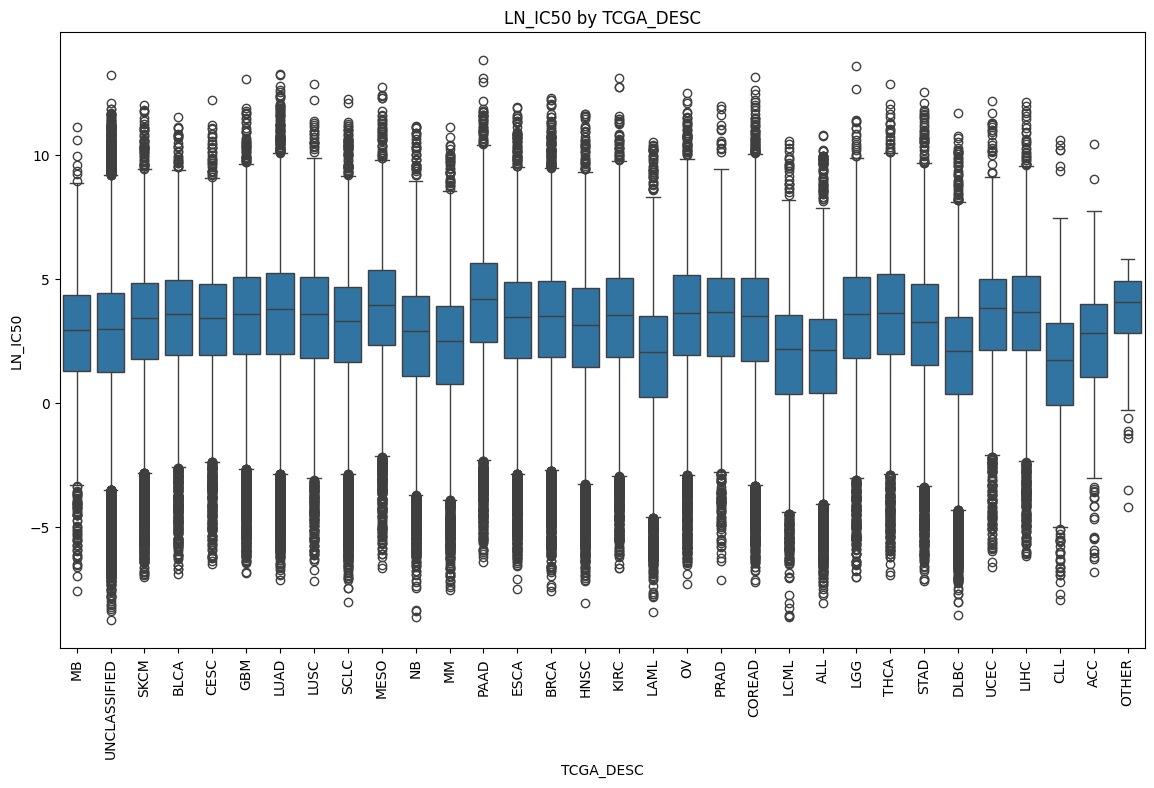

In [85]:
df = pd.read_csv('final_merged_dataset.csv')

# Missing values
missing_percent = df.isnull().mean() * 100
print("Missing values in percentage:")
print(missing_percent.sort_values(ascending=False))

# Visualize missing data pattern
plt.figure(figsize=(12,6))
msno.bar(df)
plt.title('Missing data per column')
plt.show()

# Correlation matrix for numerical features
numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Distribution of LN_IC50
plt.figure(figsize=(10, 6))
plt.hist(df['LN_IC50'].dropna(), bins=50, edgecolor='black')
plt.xlabel('LN_IC50')
plt.ylabel('Frequency')
plt.title('Distribution of LN_IC50')
plt.show()

# Scatter plot of LN_IC50 vs. AUC
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='AUC', y='LN_IC50', alpha=0.5)
plt.title('Scatter Plot of LN_IC50 vs. AUC')
plt.show()

if 'TCGA_DESC' in df.columns:
    # Count of samples per TCGA_DESC
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='TCGA_DESC')
    plt.xticks(rotation=90)
    plt.title('Count of Samples per TCGA_DESC')
    plt.show()

    # Boxplot of LN_IC50 by TCGA_DESC
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df, x='TCGA_DESC', y='LN_IC50')
    plt.xticks(rotation=90)
    plt.title('LN_IC50 by TCGA_DESC')
    plt.show()

In [86]:
missing_percent = df.isnull().mean() * 100
print("Missing values in percentage:")
print(missing_percent.sort_values(ascending=False))

# Drop columns with >50% missing values
cols_to_drop = []
for i, j in missing_percent.items():
    if j > 50:
        cols_to_drop.append(i)
df_cleaned = df.drop(columns=cols_to_drop)
print(df_cleaned.shape)

# Impute missing values for categorical features using mode
categorical = df_cleaned.select_dtypes(include='object').columns
for i in categorical:
    if df_cleaned[i].isnull().sum() > 0:
        mode_value = df_cleaned[i].mode()[0]
        df_cleaned[i] = df_cleaned[i].fillna(mode_value)

# Impute missing values for numerical features using median
numerical = df_cleaned.select_dtypes(include='number').columns
for j in numerical:
    if df_cleaned[j].isnull().sum() > 0:
        median_value = df_cleaned[j].median()
        df_cleaned[j] = df_cleaned[j].fillna(median_value)

print("Missing values after imputation:")
print(df_cleaned.isnull().sum())

df_cleaned.to_csv('final_cleaned_dataset.csv', index=False)

Missing values in percentage:
SYNONYMS                                   26.371284
Cancer Type (matching TCGA label)          21.255929
Cancer_Type_TCGA_Label                     17.977904
TARGET_x                                   11.219819
TARGET_y                                   11.219405
Microsatellite instability Status (MSI)     5.104199
Screen Medium_x                             3.870085
GDSC Tissue descriptor 2                    3.870085
Gene Expression_x                           3.870085
Methylation_x                               3.870085
Growth Properties_x                         3.870085
GDSC Tissue descriptor 1                    3.870085
CNA                                         3.870085
MSI_Status                                  1.234114
TCGA_DESC                                   0.440844
TARGET_PATHWAY_x                            0.000413
DRUG_ID                                     0.000000
CELL_LINE_NAME                              0.000000
COSMIC_ID       